# A Random Forest of Potential Customers
_... Sellin' stuff to politically exposed people_

#### Data Science 420 BB
#### University of Washington Professional & Continuing Education
#### Homework 3: Ensemble Models for Targeted Marketing Campaigns
#### Leo Salemann, 5/1/18

# 1. Summarize the Dataset

In [1]:
file <- "./Bank Data.csv"
# file <- "./BankBad.csv"
data <- read.csv(file, header=TRUE, sep=",", stringsAsFactors = FALSE)

In [2]:
# Print the dimension of the data
print(dim(data))

[1] 600  11


Eleven features; 600 observations. A fairly narrow/long data set.

In [3]:
head(data, 3)

age,sex,region,income,married,children,car,save_act,current_act,mortgage,pep
48,FEMALE,INNER_CITY,17546.0,NO,1,NO,NO,NO,NO,YES
40,MALE,TOWN,30085.1,YES,3,YES,NO,YES,YES,NO
51,FEMALE,INNER_CITY,16575.4,YES,0,YES,YES,YES,NO,NO


In [4]:
# Print the summary of the data
print(summary(data))

      age            sex               region              income     
 Min.   :18.00   Length:600         Length:600         Min.   : 5014  
 1st Qu.:30.00   Class :character   Class :character   1st Qu.:17264  
 Median :42.00   Mode  :character   Mode  :character   Median :24925  
 Mean   :42.40                                         Mean   :27524  
 3rd Qu.:55.25                                         3rd Qu.:36173  
 Max.   :67.00                                         Max.   :63130  
   married             children         car              save_act        
 Length:600         Min.   :0.000   Length:600         Length:600        
 Class :character   1st Qu.:0.000   Class :character   Class :character  
 Mode  :character   Median :1.000   Mode  :character   Mode  :character  
                    Mean   :1.012                                        
                    3rd Qu.:2.000                                        
                    Max.   :3.000                          

### Factorize

In [5]:
str(data)

'data.frame':	600 obs. of  11 variables:
 $ age        : int  48 40 51 23 57 57 22 58 37 54 ...
 $ sex        : chr  "FEMALE" "MALE" "FEMALE" "FEMALE" ...
 $ region     : chr  "INNER_CITY" "TOWN" "INNER_CITY" "TOWN" ...
 $ income     : num  17546 30085 16575 20375 50576 ...
 $ married    : chr  "NO" "YES" "YES" "YES" ...
 $ children   : int  1 3 0 3 0 2 0 0 2 2 ...
 $ car        : chr  "NO" "YES" "YES" "NO" ...
 $ save_act   : chr  "NO" "NO" "YES" "NO" ...
 $ current_act: chr  "NO" "YES" "YES" "YES" ...
 $ mortgage   : chr  "NO" "YES" "NO" "NO" ...
 $ pep        : chr  "YES" "NO" "NO" "NO" ...


In [6]:
data$sex      <- as.factor(data$sex)
data$region   <- as.factor(data$region)
data$married  <- as.factor(data$married)
data$car      <- as.factor(data$car )
data$save_act <- as.factor(data$save_act)

data$current_act <- as.factor(data$current_act)

data$mortgage <- as.factor(data$mortgage)
data$pep      <- as.factor(data$pep)

str(data)

'data.frame':	600 obs. of  11 variables:
 $ age        : int  48 40 51 23 57 57 22 58 37 54 ...
 $ sex        : Factor w/ 2 levels "FEMALE","MALE": 1 2 1 1 1 1 2 2 1 2 ...
 $ region     : Factor w/ 4 levels "INNER_CITY","RURAL",..: 1 4 1 4 2 4 2 4 3 4 ...
 $ income     : num  17546 30085 16575 20375 50576 ...
 $ married    : Factor w/ 2 levels "NO","YES": 1 2 2 2 2 2 1 2 2 2 ...
 $ children   : int  1 3 0 3 0 2 0 0 2 2 ...
 $ car        : Factor w/ 2 levels "NO","YES": 1 2 2 1 1 1 1 2 2 2 ...
 $ save_act   : Factor w/ 2 levels "NO","YES": 1 1 2 1 2 2 1 2 1 2 ...
 $ current_act: Factor w/ 2 levels "NO","YES": 1 2 2 2 1 2 2 2 1 2 ...
 $ mortgage   : Factor w/ 2 levels "NO","YES": 1 2 1 1 1 1 1 1 1 1 ...
 $ pep        : Factor w/ 2 levels "NO","YES": 2 1 1 1 1 2 2 1 1 1 ...


**Data review**
- Data is pretty clean, no missing values.
- Age, Income, Children distributions (min/max/mean) look nomonal. No unusually old/young, rich/poor, large/small families.
- Lots of string values that had to be factorized.

# 2. Random Forest Model

## Separate test & training data

In [7]:
num_obs = nrow(data)

set.seed(98027) 

index_shuffled <- sample(num_obs)
training_ratio <- 0.8
training_size <- round(num_obs * training_ratio)
training_index <- index_shuffled[1:training_size]
testing_index <- index_shuffled[(training_size+1):num_obs]
training_data <- data[training_index,]
testing_data <- data[testing_index,]

## Random Forest

In [8]:
library(randomForest)
library(tictoc)
tic()
print("Start training RF model with 200 trees using 1 core")
rf_model <- randomForest(pep ~ ., data = training_data, ntree = 200, mtry = 5, 
                         nodesize=3, importance=TRUE)
print("Training 200 trees completed.")
toc()
## Show "importance" of variables: higher value mean more important (MeanDecreaseAccuracy): 
print(round(importance(rf_model), 2))

randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.


[1] "Start training RF model with 200 trees using 1 core"
[1] "Training 200 trees completed."
0.18 sec elapsed
               NO   YES MeanDecreaseAccuracy MeanDecreaseGini
age          7.72  3.88                 9.10            30.27
sex         -0.94  0.22                -0.48             3.28
region       0.46 -0.13                 0.20            12.23
income      22.93 23.44                32.67            63.81
married     21.25 18.50                25.81            17.00
children    44.11 46.12                52.94            63.25
car         -1.22 -2.16                -2.18             3.00
save_act     9.21 14.74                16.11            10.68
current_act -2.46 -0.73                -2.55             3.54
mortgage    13.50 13.85                16.77            14.11


## Check the accuracy on testing data

In [9]:
pred_test <- predict(rf_model, testing_data, type='response')
accuracy <- sum(pred_test==testing_data[,"pep"])/nrow(testing_data)*100
print(paste("The accuracy on testing data is ", round(accuracy, 2), "%", sep=""))

[1] "The accuracy on testing data is 90%"


Start Keeping Score ...

|Model        |Accuracy|
|-------------|--------|
|Random Forest| 90.00% |

## Check the ROC on testing data

Loading required package: gplots

Attaching package: ‘gplots’

The following object is masked from ‘package:stats’:

    lowess



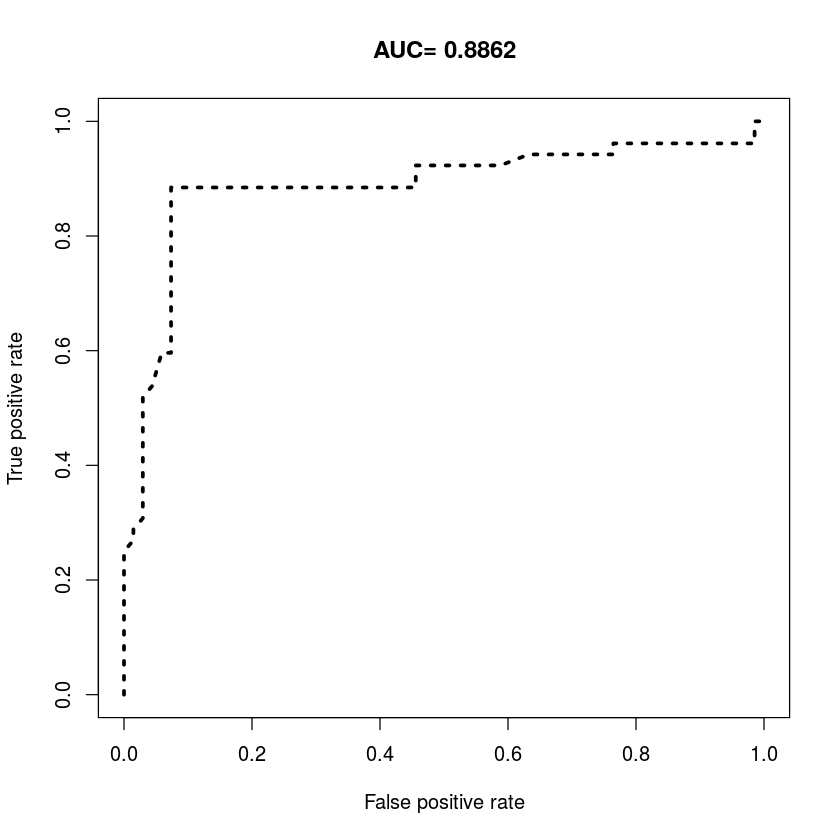

In [10]:
pred_test <- predict(rf_model, testing_data, type='prob')
library(ROCR)
pred <- prediction(pred_test[,2], testing_data[,"pep"])
perf <- performance(pred,"tpr","fpr")

auc <- performance(pred,"auc")
plot(perf,col="black",lty=3, lwd=3, main=paste("AUC=", round(unlist(slot(auc, "y.values")),4)))

Update the leaderboard ...

|Model        |Accuracy|AUC   |
|-------------|--------|------|
|Random Forest| 90.00% |0.8862|

#### Speed up RF Training by Parallelization ...

In [11]:
library(doSNOW)
library(foreach)
library(parallel)


# Setting number of cores in your machine. 
num_cores <- detectCores()
cl <- makeCluster(num_cores-1)
registerDoSNOW(cl)
ntrees <- 200

tic()
print(paste("Start training RF model with 200 trees using ", num_cores-1, " core", sep=""))

rf <- foreach(ntree = rep(round(ntrees/(num_cores-1)), num_cores-1), .combine = combine, .packages = "randomForest") %dopar% 
  randomForest(income~., data=training_data, ntree=ntree, mtry=3, 
                         importance=TRUE, nodesize=5, do.trace = TRUE)

print("Training 200 trees completed.")
toc()
stopCluster(cl)

Loading required package: foreach
Loading required package: iterators
Loading required package: snow

Attaching package: ‘parallel’

The following objects are masked from ‘package:snow’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, clusterSplit, makeCluster, parApply,
    parCapply, parLapply, parRapply, parSapply, splitIndices,
    stopCluster



[1] "Start training RF model with 200 trees using 1 core"
[1] "Training 200 trees completed."
0.359 sec elapsed


### Random Forest model Q&A
_a. What is the accuracy of this random forest model on the testing data?_ **90%**

_b. What is the AUC of this random forest model on the testing data?_ **0.8862**

_c. Is accuracy a good performance metrics or not? If not, why?_<br>**Not particularly. Accuracy doesn't tell you much without the context of other factors such as precision or recall. High Accuracy alone leads to over fittting. Other good mertics are the four corners of the confusion matrix (TP, TN, FP, FN), or area under the ROC.**


_d. What is the training time for the number of trees you built?_ **0.133 sec **

_e. How can you speed up the training process by parallelization?_ <br>**R Library parallel and its dependencies. Also need sufficent hardware**

_f. Does the model trained via parallelization have the same performance as the one trained using a single core?_<br>**Oddly enough, parrellizaiton took 0.266 sec instad of 0.133.  Could be because I'm running on virtual hardware. Or maybe the data set is so small, that the overhead of setting up prallelizaiton outweighs the payoff of faster processing**

# 3. Gradient Boosted Decision Trees

## Feature Engineering & Tweakage

gbm demands numeric target variables, so we chall appease it.

In [12]:
head(training_data,3)

,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pep
99,35,FEMALE,INNER_CITY,12125.8,NO,2,NO,YES,YES,NO,NO
516,48,FEMALE,INNER_CITY,16662.5,YES,1,NO,YES,YES,NO,YES
191,67,FEMALE,SUBURBAN,63130.1,YES,2,YES,YES,YES,NO,YES


In [13]:
training_data[,"pep"] <- as.character(training_data[,"pep"])
training_data[training_data[,"pep"]=='YES', "pep"] <- 1
training_data[training_data[,"pep"]=='NO',  "pep"] <- 0
head(training_data,3)

,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pep
99,35,FEMALE,INNER_CITY,12125.8,NO,2,NO,YES,YES,NO,0
516,48,FEMALE,INNER_CITY,16662.5,YES,1,NO,YES,YES,NO,1
191,67,FEMALE,SUBURBAN,63130.1,YES,2,YES,YES,YES,NO,1


In [14]:
testing_data[,"pep"] <- as.character(testing_data[,"pep"])
testing_data[testing_data[,"pep"]=='YES', "pep"] <- 1
testing_data[testing_data[,"pep"]=='NO',  "pep"] <- 0
head(testing_data,3)

,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pep
475,31,FEMALE,TOWN,22678.1,NO,1,YES,YES,YES,YES,1
37,19,MALE,RURAL,10953.0,YES,3,YES,YES,YES,NO,0
460,66,MALE,TOWN,46963.9,YES,1,NO,YES,YES,NO,1


In [15]:
training_data[,"pep"] <- as.numeric(training_data[,"pep"])
testing_data[,"pep"] <- as.numeric(testing_data[,"pep"])

print("training sumary--------------------------------------------")
str(training_data)
print(" ")
print("testing sumary----------------------------------------")
str(testing_data)

[1] "training sumary--------------------------------------------"
'data.frame':	480 obs. of  11 variables:
 $ age        : int  35 48 67 20 55 34 27 37 26 21 ...
 $ sex        : Factor w/ 2 levels "FEMALE","MALE": 1 1 1 2 2 2 2 1 2 2 ...
 $ region     : Factor w/ 4 levels "INNER_CITY","RURAL",..: 1 1 3 1 4 2 1 1 1 4 ...
 $ income     : num  12126 16662 63130 11700 26774 ...
 $ married    : Factor w/ 2 levels "NO","YES": 1 2 2 2 2 2 1 1 2 1 ...
 $ children   : int  2 1 2 0 0 1 0 2 3 0 ...
 $ car        : Factor w/ 2 levels "NO","YES": 1 1 2 1 1 2 1 2 1 2 ...
 $ save_act   : Factor w/ 2 levels "NO","YES": 2 2 2 2 1 2 2 1 2 2 ...
 $ current_act: Factor w/ 2 levels "NO","YES": 2 2 2 1 2 2 1 1 2 2 ...
 $ mortgage   : Factor w/ 2 levels "NO","YES": 1 1 1 1 2 1 1 1 2 2 ...
 $ pep        : num  0 1 1 0 1 1 1 0 0 0 ...
[1] " "
[1] "testing sumary----------------------------------------"
'data.frame':	120 obs. of  11 variables:
 $ age        : int  31 19 66 27 43 42 66 40 39 54 ...
 $ sex       

In [16]:
library(gbm)

Loading required package: survival
Loading required package: lattice
Loading required package: splines
Loaded gbm 2.1.3


In [17]:
tic()
ntrees <- 250
gbm_model <- gbm(formula = pep ~ ., distribution =  "bernoulli", data = training_data, 
                 n.trees = ntrees, interaction.depth = 4, n.minobsinnode = 5, shrinkage = 0.01)
toc()

0.117 sec elapsed


## Prediction Tests

In [18]:
pred_test <- predict(gbm_model, testing_data, n.trees = ntrees, type='response')
pred_test[pred_test > 0.5] <- 1
pred_test[pred_test <= 0.5] <- 0
accuracy <- sum(pred_test==testing_data[,"pep"])/nrow(testing_data)*100
print(paste("The accuracy on testing data is ", round(accuracy, 2), "%", sep=""))

[1] "The accuracy on testing data is 83.33%"


Update the leaderboard ...

|Model            |Accuracy|AUC   |
|-----------------|--------|------|
|Random Forest    | 90.00% |0.8862|
|Gradient Boosted | 83.33% |      |

## Check the ROC on testing data

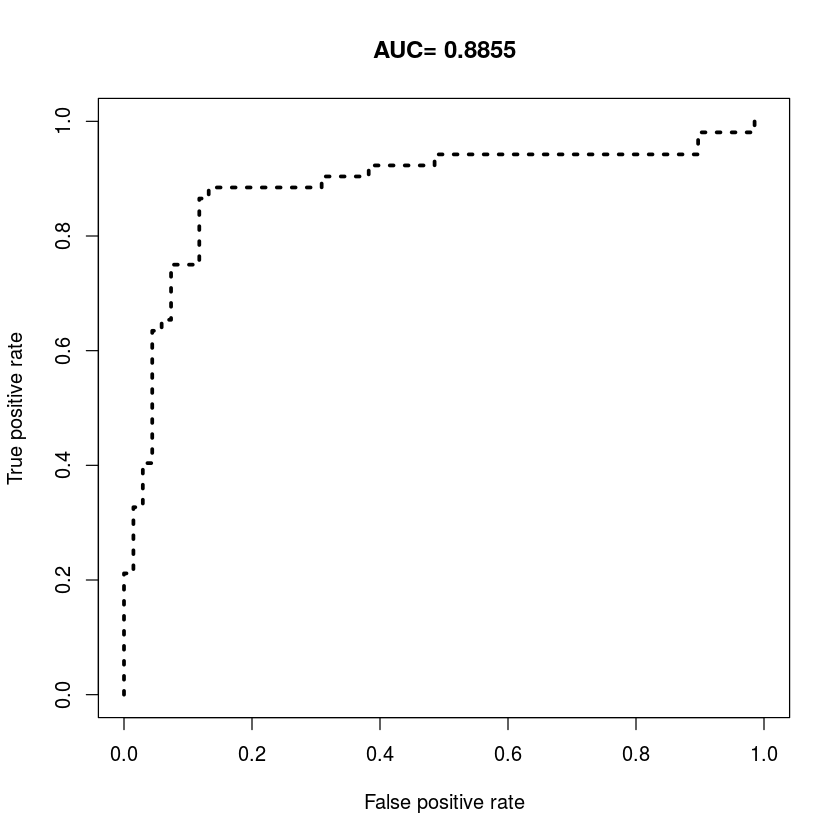

In [19]:
pred_test <- predict(gbm_model, testing_data, n.trees = ntrees, type='response')
library(ROCR)
pred <- prediction(pred_test, testing_data[,"pep"])
perf <- performance(pred,"tpr","fpr")

auc <- performance(pred,"auc")
plot(perf,col="black",lty=3, lwd=3, main=paste("AUC=", round(unlist(slot(auc, "y.values")),4)))

Update the leaderboard ...

|Model            |Accuracy|AUC   |
|-----------------|--------|------|
|Random Forest    | 90.83% |0.8833|
|Gradient Boosted | 83.33% |0.8855|

## Try again with 500 trees

0.16 sec elapsed
[1] "The accuracy on testing data is 89.17%"


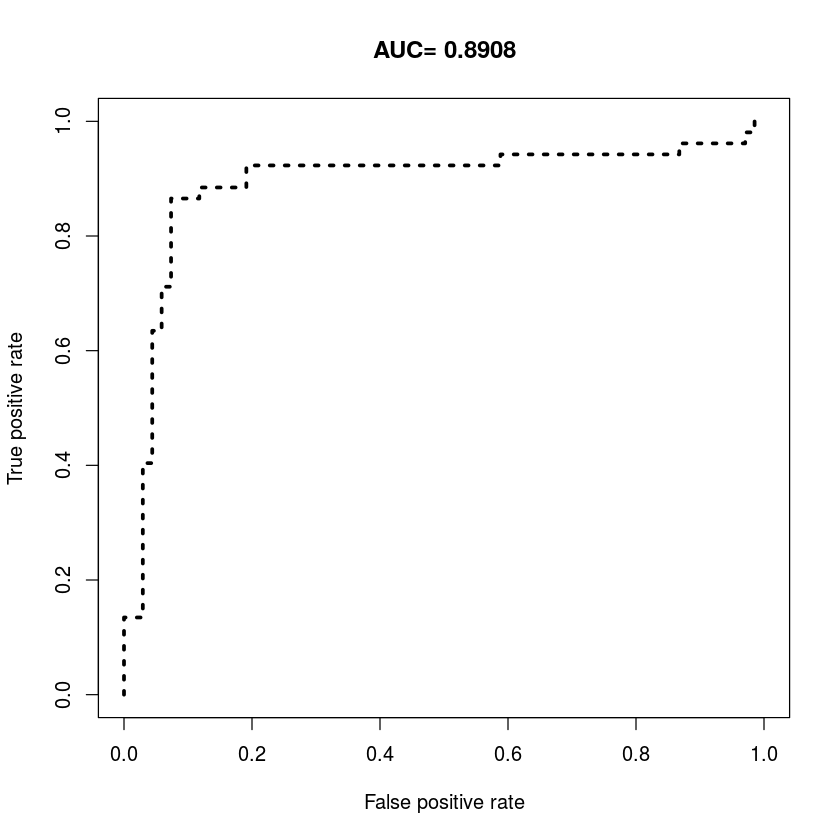

In [20]:
tic()
ntrees <- 500
gbm_model <- gbm(formula = pep ~ ., distribution =  "bernoulli", data = training_data, 
                 n.trees = ntrees, interaction.depth = 4, n.minobsinnode = 5, shrinkage = 0.01)
toc()

pred_test <- predict(gbm_model, testing_data, n.trees = ntrees, type='response')
pred_test[pred_test > 0.5] <- 1
pred_test[pred_test <= 0.5] <- 0
accuracy <- sum(pred_test==testing_data[,"pep"])/nrow(testing_data)*100
print(paste("The accuracy on testing data is ", round(accuracy, 2), "%", sep=""))

pred_test <- predict(gbm_model, testing_data, n.trees = ntrees, type='response')
pred <- prediction(pred_test, testing_data[,"pep"])
perf <- performance(pred,"tpr","fpr")

auc <- performance(pred,"auc")
plot(perf,col="black",lty=3, lwd=3, main=paste("AUC=", round(unlist(slot(auc, "y.values")),4)))

### Gradient boosted decision trees (GBM) Q&A
_a. What is the accuracy of this random forest model on the testing data?_ **83.33%**

_b. What is the AUC of this random forest model on the testing data?_ **0.8829**

_c. Is accuracy a good performance metrics or not? If not, why?_<br>**Same issues as for Random Forest**

_d. What is the training time for the number of trees you built?_ **0.102 sec**

_e. Does GBM perform better than Random Forest?_<br>**In this case, no.**

|Model            |Accuracy|AUC   |
|-----------------|--------|------|
|Random Forest    | 90.00% |0.8862|
|Gradient Boosted | 83.33% |0.8855|


_f. If you increase the number of trees in GBM to 500, is the performance on the training
data getting better?_<br> **Assuming perormance means speed, it's a bit slower (0.150 vs 0.102)**

_g. Is the performance on the testing data getting better as well?_<br>**Yes, accuracy is improving; but more imprtantly, AUC is better**


|Model|Trees|Speed|Accuracy|AUC   |
|-----|-----|-----|--------|------|
| RF  | 250 |0.133| 90.00% |0.8862|
| GBM | 250 |0.102| 83.33% |0.8855|
| GBM | 500 |0.150| 89.17% |0.8908|